In [151]:
from utils.CaImageCSV import CaImageCSV
import utils.sulfur.constant as const

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [2]:
file_path = './resources/ID181106CreA_Longitudinal_Traces.csv'
csv = CaImageCSV(file_path)
csv

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<CaImageCSV csv_path=./resources/ID181106CreA_Longitudinal_Traces.csv>

In [3]:
def __dropna_and_fillna(matrix):
    matrix.dropna(how='all', axis=1, inplace=True)
    matrix.fillna(0.0, inplace=True, axis=1)

In [4]:
def all_nan_cells(matrix):
    nan_cells = np.array([])
    for cell_name, items in matrix.iteritems():
        if items.isnull().all():
            nan_cells = np.append(nan_cells, cell_name)
            
    return nan_cells

In [5]:
def droped_unique_cells(cells1, cells2):
    droped_cells = np.array([])
    droped_cells = np.append(droped_cells, cells1)
    droped_cells = np.append(droped_cells, cells2)
    droped_cells = np.unique(droped_cells)
    return droped_cells

In [127]:
def splitted_context_name(context_name, index):
    return '%s_%d' % (context_name, index)

def build_matrix_index(context_name, cells):
    index_df = pd.DataFrame(data=([context_name] * len(cells)))
    index_df.columns = ['context']
    cells = cells.reset_index(drop=True)
    index_df['cell_name'] = cells
    return pd.MultiIndex.from_frame(index_df, names=['context_name', 'cell_name'])

def split_matrix(matrix, context_name):
    matrix_1 = matrix.iloc[0:400, :]
    matrix_2 = matrix.iloc[900:1300, :]
    matrix_3 = matrix.iloc[1800:2200, :]
    
    matrix_1.rename(lambda x: splitted_context_name(x, 1), inplace=True)
    matrix_2.rename(lambda x: splitted_context_name(x, 2), inplace=True)
    matrix_3.rename(lambda x: splitted_context_name(x, 3), inplace=True)
    
    return matrix_1, matrix_2, matrix_3

In [129]:
A1postES_data = csv.filtered_by_context('A1postES').astype(float).copy(deep=True)
A1postES_data = csv.optimize_std(A1postES_data)
A1postES_data.reset_index(level=1, drop=True, inplace=True)

A1postES_engram = A1postES_data.loc[:, csv.engram_cells()]
A1postES_non_engram = A1postES_data.loc[:, csv.non_engram_cells()]

A1postES_nan_engram_cells = all_nan_cells(A1postES_engram)
A1postES_nan_non_engram_cells = all_nan_cells(A1postES_non_engram)

A4postES_data = csv.filtered_by_context('A4postES').astype(float).copy(deep=True)
A4postES_data = csv.optimize_std(A4postES_data)
A4postES_data.reset_index(level=1, drop=True, inplace=True)

A4postES_engram = A4postES_data.loc[:, csv.engram_cells()]
A4postES_non_engram = A4postES_data.loc[:, csv.non_engram_cells()]

A4postES_nan_engram_cells = all_nan_cells(A4postES_engram)
A4postES_nan_non_engram_cells = all_nan_cells(A4postES_non_engram)

droped_engram_cells = droped_unique_cells(A1postES_nan_engram_cells, A4postES_nan_engram_cells)
droped_non_engram_cells = droped_unique_cells(A1postES_nan_non_engram_cells, A4postES_nan_non_engram_cells)

A1postES_engram.drop(columns=droped_engram_cells, inplace=True)
A1postES_non_engram.drop(columns=droped_non_engram_cells, inplace=True)

A4postES_engram.drop(columns=droped_engram_cells, inplace=True)
A4postES_non_engram.drop(columns=droped_non_engram_cells, inplace=True)

engram_A1postES_1, engram_A1postES_2, engram_A1postES_3 = split_matrix(A1postES_engram, 'A1postES')
engram_A4postES_1, engram_A4postES_2, engram_A4postES_3 = split_matrix(A4postES_engram, 'A4postES')
engram_df = pd.concat([engram_A1postES_1, engram_A1postES_2, engram_A1postES_3, engram_A4postES_1, engram_A4postES_2, engram_A4postES_3])
print(engram_df)

non_engram_A1postES_1, non_engram_A1postES_2, non_engram_A1postES_3 = split_matrix(A1postES_non_engram, 'A1postES')
non_engram_A4postES_1, non_engram_A4postES_2, non_engram_A4postES_3 = split_matrix(A4postES_non_engram, 'A4postES')
non_engram_df = pd.concat([non_engram_A1postES_1, non_engram_A1postES_2, non_engram_A1postES_3, non_engram_A4postES_1, non_engram_A4postES_2, non_engram_A4postES_3])
print(non_engram_df)

                C030      C037      C073      C078      C113      C121  \
context                                                                  
A1postES_1  0.018853  0.922489  0.591293  0.106198  0.366221  0.009058   
A1postES_1  0.357933  0.831268  0.533469  0.099783  0.329046  0.008177   
A1postES_1  0.318956  0.900972  0.481300  0.093755  0.295644  0.007381   
A1postES_1  0.469151  0.823313  0.434233  0.088091  0.398935  0.006662   
A1postES_1  0.485524  0.741891  2.392631  0.082770  0.413079  0.006014   
...              ...       ...       ...       ...       ...       ...   
A4postES_3  0.770473  0.404439  0.865635  1.690493  0.273649  0.407538   
A4postES_3  0.674169  0.480911  0.790130  2.254427  0.246499  0.378612   
A4postES_3  0.589903  0.436915  0.721212  4.147704  0.222043  0.351739   
A4postES_3  0.516170  0.520848  0.658305  3.701166  0.200013  0.326773   
A4postES_3  0.451652  0.486185  0.600885  3.302702  0.180169  0.303579   

                C125      C230      C

/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [140]:
pca = PCA()
PCA_train = pca.fit_transform(engram_df)
PCA_train_df = pd.DataFrame(data=PCA_train, index=engram_df.index)

In [141]:
PCA_train_df

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
context,,,,,,,,,,,,,,,,,,,,,
A1postES_1,-0.971391,0.655285,0.490280,1.529315,-0.415884,-1.198846,1.238348,-1.212339,0.328605,0.003501,...,-0.031766,0.905997,-0.621619,-1.281759,0.516734,0.081725,-0.125331,0.935253,-0.023192,-0.069667
A1postES_1,-0.914011,0.496545,0.246797,1.460064,-0.585632,-1.068195,1.289907,-1.193459,0.258156,0.141441,...,-0.231138,0.714976,-0.718226,-1.225597,0.444469,0.096266,-0.121113,0.855232,-0.059484,0.168160
A1postES_1,-1.254322,0.701317,0.638238,1.546382,-0.339738,-1.224762,1.527771,-1.306822,0.143232,0.183092,...,-0.276317,0.658268,-0.833415,-1.053269,0.450098,0.118171,-0.222916,0.648768,0.084249,0.213734
A1postES_1,-1.045767,0.810826,0.623675,1.560897,-0.176576,-0.986873,1.672184,-0.791961,0.244641,0.220080,...,-0.091664,0.438227,-0.774256,-0.998669,0.587150,0.339001,-0.243570,0.275825,-0.096178,0.320447
A1postES_1,-1.613183,0.297789,0.336824,0.976606,-0.003660,-0.624440,1.762905,-0.561466,0.095476,-0.653971,...,0.420212,0.920195,-0.675820,-0.351489,0.346938,1.158050,-0.093948,0.390966,-0.015794,0.733050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A4postES_3,0.555908,-0.886544,0.167259,0.229207,0.420682,-1.615827,-0.055954,0.801067,0.645447,0.787445,...,0.296929,-1.071008,0.153669,-0.569485,-0.744638,-0.639469,0.134921,-1.191476,2.676535,0.804656
A4postES_3,0.284891,-1.104135,-0.012104,0.135986,0.304947,-1.643037,-0.167382,0.637845,0.363883,0.895188,...,0.081315,-1.019835,0.050833,-0.636998,-0.614570,-0.788699,0.132984,-1.311648,2.331066,0.560384
A4postES_3,-0.303681,-1.776127,-0.710794,-0.139019,0.267769,-1.592758,-0.531646,0.493667,0.211110,0.895743,...,-0.102591,-0.790394,-0.175639,-0.632328,-0.130229,-1.526419,0.504787,-1.927364,1.893249,0.206602


In [142]:
pca.explained_variance_ratio_

array([0.14708284, 0.09066986, 0.07077727, 0.06363734, 0.05954993,
       0.05295421, 0.04871256, 0.04485325, 0.03925029, 0.03543968,
       0.03504447, 0.03226801, 0.02994248, 0.02815039, 0.02594802,
       0.02518638, 0.02122522, 0.01984151, 0.01841286, 0.01734431,
       0.01710032, 0.01617497, 0.01521647, 0.01276798, 0.01202908,
       0.01077492, 0.00964539])

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatterPlot(xDF, animal_name):
    tempDF = pd.DataFrame(data=xDF.loc[:, 0:1])
    tempDF.columns = ['first vector', 'second vector']
    tempDF = tempDF.reset_index(level=0)
    sns.lmplot(x='first vector', y = 'second vector', hue='context', data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title(animal_name)
    plt.show()

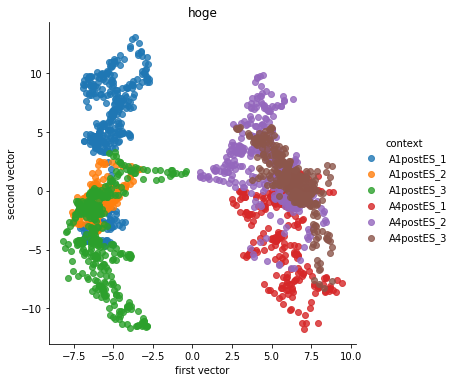

In [157]:
scatterPlot(PCA_train_df, 'hoge')

In [148]:
pca = PCA()
PCA_train = pca.fit_transform(non_engram_df)
PCA_train_df = pd.DataFrame(data=PCA_train, index=non_engram_df.index)

In [149]:
pca.explained_variance_ratio_

array([1.01608480e-01, 4.25575066e-02, 3.36913490e-02, 2.91263154e-02,
       2.82892031e-02, 2.55748134e-02, 2.39327876e-02, 2.30843531e-02,
       2.13524416e-02, 1.98105075e-02, 1.85804617e-02, 1.81088354e-02,
       1.67444641e-02, 1.64021987e-02, 1.52901205e-02, 1.50202022e-02,
       1.40138702e-02, 1.35480553e-02, 1.27202667e-02, 1.24639545e-02,
       1.21415466e-02, 1.18428560e-02, 1.17710635e-02, 1.13994970e-02,
       1.07098946e-02, 1.06344582e-02, 1.01475194e-02, 9.16415268e-03,
       9.04080335e-03, 8.87844245e-03, 8.64903910e-03, 8.56637131e-03,
       8.35956816e-03, 8.12638214e-03, 7.82394284e-03, 7.60472499e-03,
       7.52914308e-03, 7.25372469e-03, 7.11475743e-03, 6.91513307e-03,
       6.46209963e-03, 6.35093056e-03, 6.15590241e-03, 6.06855575e-03,
       5.97166738e-03, 5.77416723e-03, 5.54086893e-03, 5.48622148e-03,
       5.25616381e-03, 5.20595101e-03, 4.93822001e-03, 4.89509020e-03,
       4.88190389e-03, 4.73389293e-03, 4.64000558e-03, 4.52043078e-03,
      

         context  first vector  second vector
0     A1postES_1      7.500794      -0.345584
1     A1postES_1      7.572028      -0.371123
2     A1postES_1      7.632518      -0.337745
3     A1postES_1      7.651513      -0.454526
4     A1postES_1      7.606230      -0.814735
...          ...           ...            ...
2382  A4postES_3     -5.881374       0.180196
2383  A4postES_3     -6.212987      -0.103792
2384  A4postES_3     -6.239231      -0.458413
2385  A4postES_3     -5.766509      -0.313315
2386  A4postES_3     -5.333623      -0.333577

[2387 rows x 3 columns]
         context  first vector  second vector
0     A1postES_1      7.500794      -0.345584
1     A1postES_1      7.572028      -0.371123
2     A1postES_1      7.632518      -0.337745
3     A1postES_1      7.651513      -0.454526
4     A1postES_1      7.606230      -0.814735
...          ...           ...            ...
2382  A4postES_3     -5.881374       0.180196
2383  A4postES_3     -6.212987      -0.103792
2384  A4p

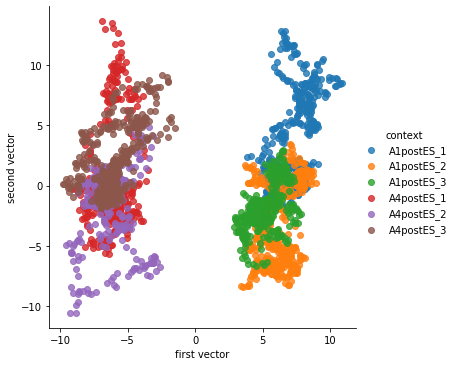

In [150]:
scatterPlot(PCA_train_df)

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

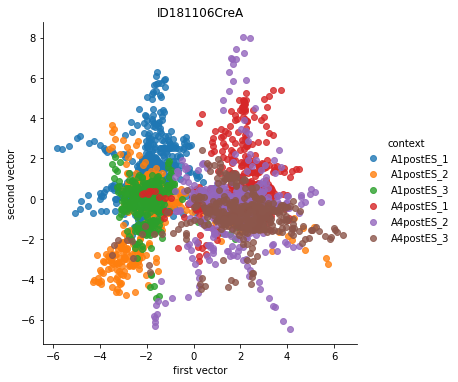

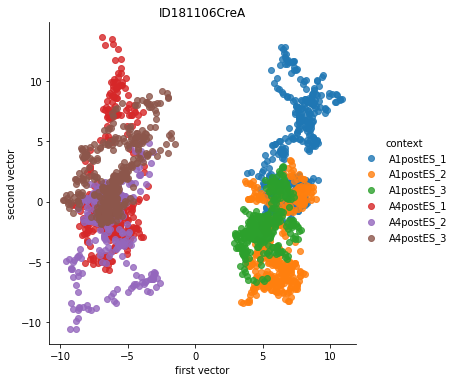

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

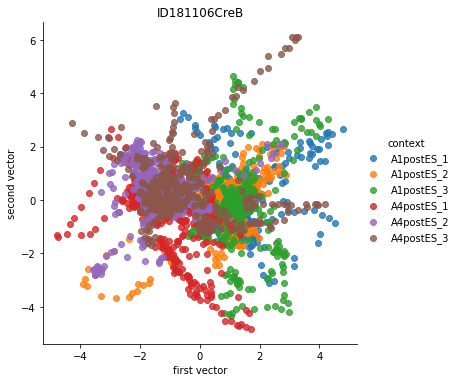

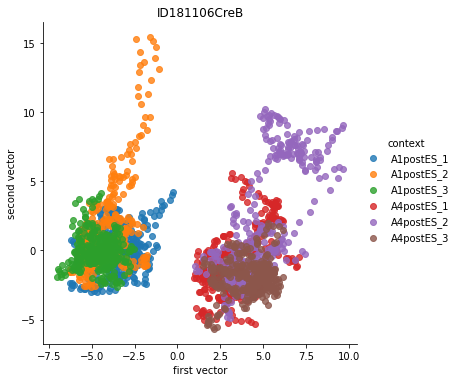

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

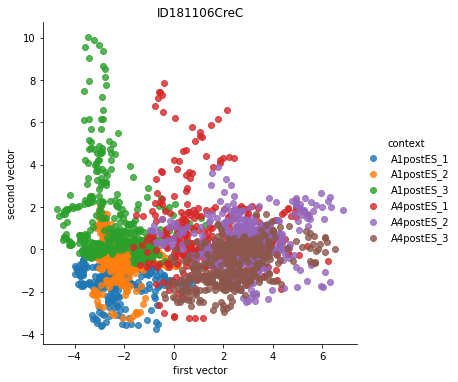

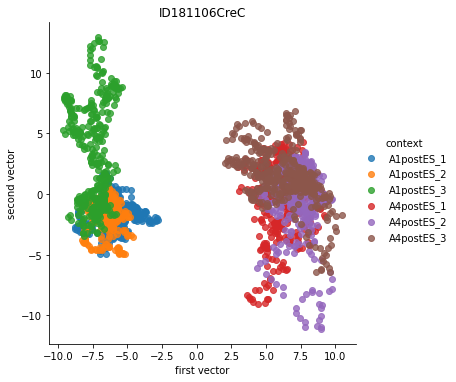

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

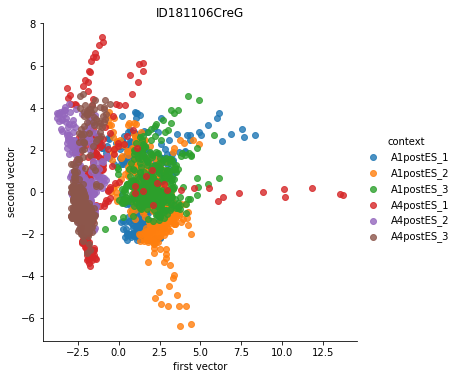

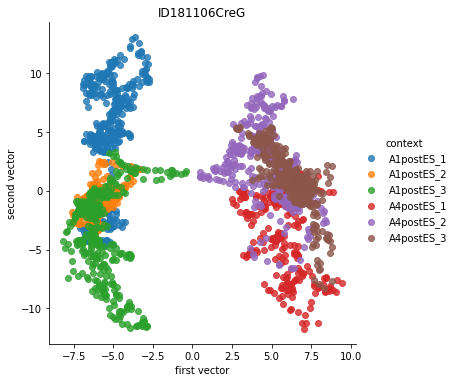

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

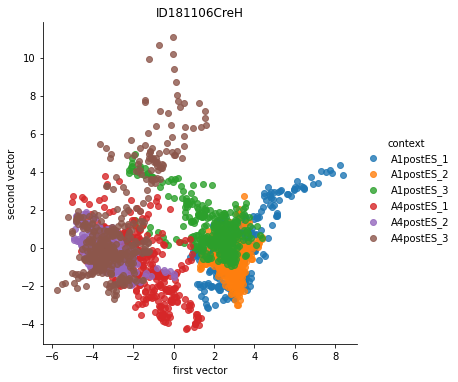

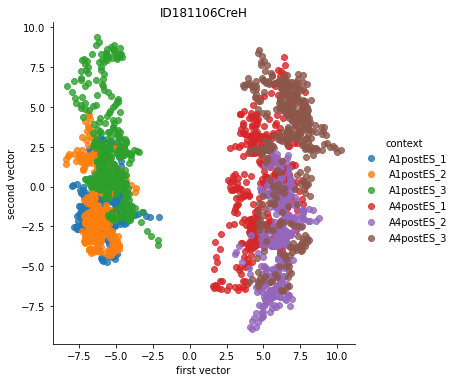

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

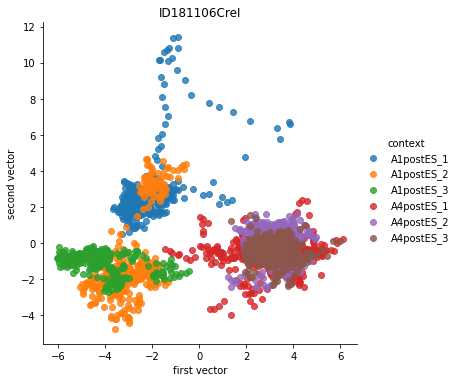

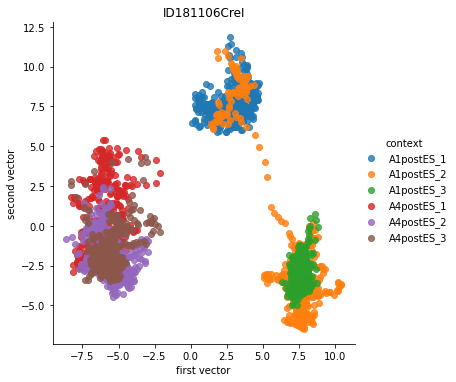

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

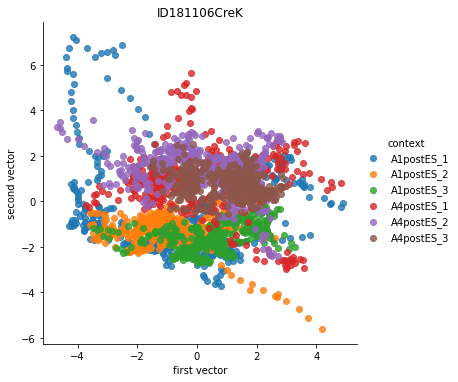

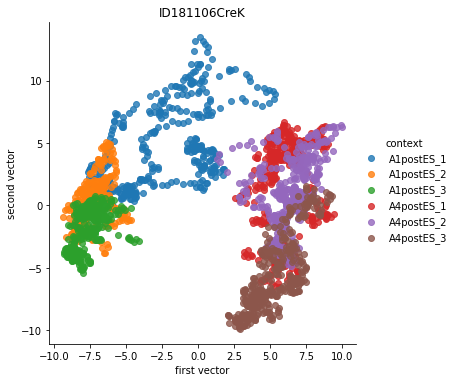

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

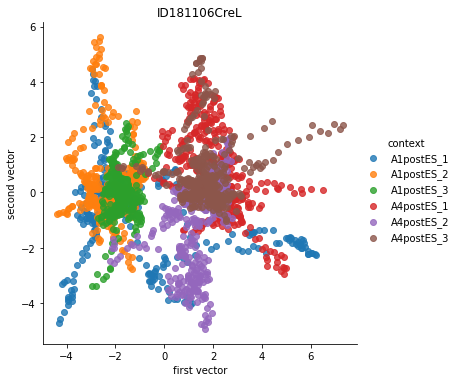

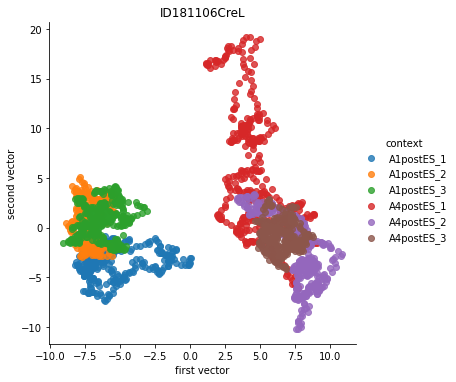

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

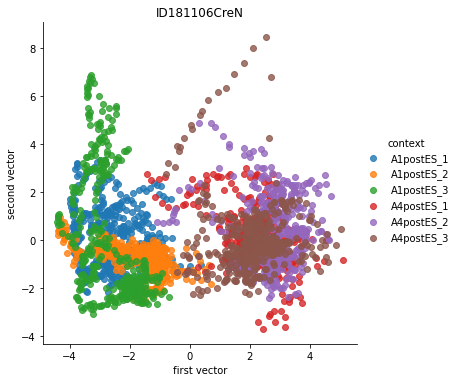

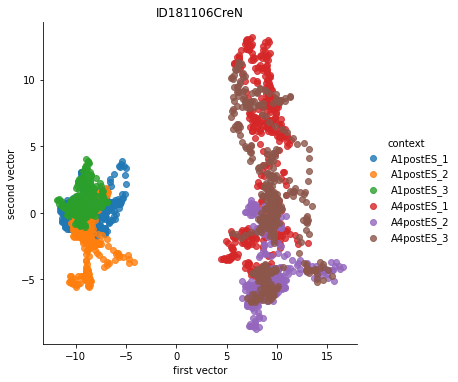

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

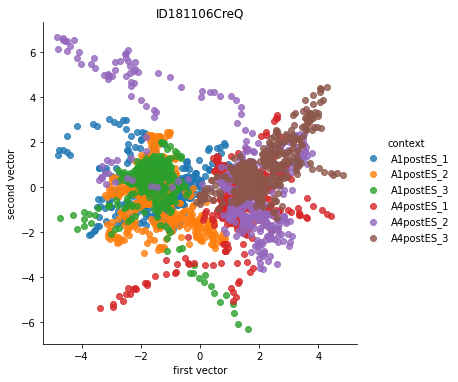

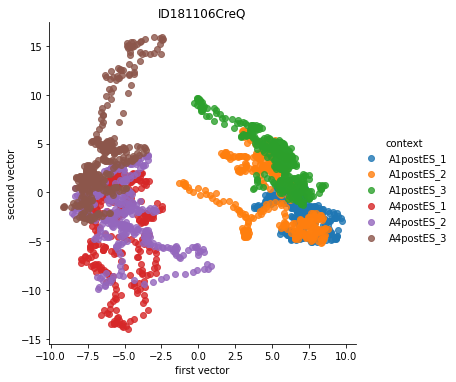

In [158]:
result_for_pca = {}
for animal_name in const.ANIMAL_NAMES:
    file_path = './resources/%s_Longitudinal_Traces.csv' % animal_name
    csv = CaImageCSV(file_path)
    
    A1postES_data = csv.filtered_by_context('A1postES').astype(float).copy(deep=True)
    A1postES_data = csv.optimize_std(A1postES_data)
    A1postES_data.reset_index(level=1, drop=True, inplace=True)

    A1postES_engram = A1postES_data.loc[:, csv.engram_cells()]
    A1postES_non_engram = A1postES_data.loc[:, csv.non_engram_cells()]

    A1postES_nan_engram_cells = all_nan_cells(A1postES_engram)
    A1postES_nan_non_engram_cells = all_nan_cells(A1postES_non_engram)

    A4postES_data = csv.filtered_by_context('A4postES').astype(float).copy(deep=True)
    A4postES_data = csv.optimize_std(A4postES_data)
    A4postES_data.reset_index(level=1, drop=True, inplace=True)

    A4postES_engram = A4postES_data.loc[:, csv.engram_cells()]
    A4postES_non_engram = A4postES_data.loc[:, csv.non_engram_cells()]

    A4postES_nan_engram_cells = all_nan_cells(A4postES_engram)
    A4postES_nan_non_engram_cells = all_nan_cells(A4postES_non_engram)

    droped_engram_cells = droped_unique_cells(A1postES_nan_engram_cells, A4postES_nan_engram_cells)
    droped_non_engram_cells = droped_unique_cells(A1postES_nan_non_engram_cells, A4postES_nan_non_engram_cells)

    A1postES_engram.drop(columns=droped_engram_cells, inplace=True)
    A1postES_non_engram.drop(columns=droped_non_engram_cells, inplace=True)

    A4postES_engram.drop(columns=droped_engram_cells, inplace=True)
    A4postES_non_engram.drop(columns=droped_non_engram_cells, inplace=True)

    engram_A1postES_1, engram_A1postES_2, engram_A1postES_3 = split_matrix(A1postES_engram, 'A1postES')
    engram_A4postES_1, engram_A4postES_2, engram_A4postES_3 = split_matrix(A4postES_engram, 'A4postES')
    engram_df = pd.concat([engram_A1postES_1, engram_A1postES_2, engram_A1postES_3, engram_A4postES_1, engram_A4postES_2, engram_A4postES_3])

    non_engram_A1postES_1, non_engram_A1postES_2, non_engram_A1postES_3 = split_matrix(A1postES_non_engram, 'A1postES')
    non_engram_A4postES_1, non_engram_A4postES_2, non_engram_A4postES_3 = split_matrix(A4postES_non_engram, 'A4postES')
    non_engram_df = pd.concat([non_engram_A1postES_1, non_engram_A1postES_2, non_engram_A1postES_3, non_engram_A4postES_1, non_engram_A4postES_2, non_engram_A4postES_3])
    
    # pca for engram cell
    pca = PCA()
    PCA_train = pca.fit_transform(engram_df)
    PCA_train_df = pd.DataFrame(data=PCA_train, index=engram_df.index)
    
    result_for_pca['%s_engram' % animal_name] = PCA_train_df
    
    scatterPlot(PCA_train_df, animal_name)
    
    # pca for non-engram cell
    pca = PCA()
    PCA_train = pca.fit_transform(non_engram_df)
    PCA_train_df = pd.DataFrame(data=PCA_train, index=non_engram_df.index)
    
    result_for_pca['%s_non_engram' % animal_name] = PCA_train_df
    
    scatterPlot(PCA_train_df, animal_name)

In [159]:
result_for_pca

{'ID181106CreA_engram':                   0         1         2         3         4         5   \
 context                                                                  
 A1postES_1 -0.971391  0.655285  0.490280  1.529315 -0.415884 -1.198846   
 A1postES_1 -0.914011  0.496545  0.246797  1.460064 -0.585632 -1.068195   
 A1postES_1 -1.254322  0.701317  0.638238  1.546382 -0.339738 -1.224762   
 A1postES_1 -1.045767  0.810826  0.623675  1.560897 -0.176576 -0.986873   
 A1postES_1 -1.613183  0.297789  0.336824  0.976606 -0.003660 -0.624440   
 ...              ...       ...       ...       ...       ...       ...   
 A4postES_3  0.555908 -0.886544  0.167259  0.229207  0.420682 -1.615827   
 A4postES_3  0.284891 -1.104135 -0.012104  0.135986  0.304947 -1.643037   
 A4postES_3 -0.303681 -1.776127 -0.710794 -0.139019  0.267769 -1.592758   
 A4postES_3 -0.336585 -2.005998 -0.680633 -0.296010  0.058293 -1.485969   
 A4postES_3 -0.320217 -1.696153 -0.705354 -0.436214  0.137610 -1.313558   
 
